In [50]:
#Single-Qubit Gates
#Amitava Chakraborty - 10th Jun 2019
from qiskit import IBMQ
# Loading your IBM Q account(s)
#IBMQ.load_account()

In [51]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cmath, math
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer, Aer
from qiskit.tools.visualization import plot_bloch_multivector, plot_bloch_vector, iplot_state_qsphere, plot_histogram, plot_state_qsphere

In [52]:
#Some functions
def plot_circle(complex_number):
    r = math.sqrt(complex_number.real**2+complex_number.imag**2)
    X = np.linspace(-r,r, 250)
    #Y = [r*np.exp(1j*theta) for theta in np.linspace(0,2*pi, 115)]
    Y = [math.sqrt(r**2-x**2) for x in X]
    Y_ = [-i for i in Y]
    Y = np.array(Y)
    Y_ = np.array(Y_)
    #plt.plot(np.real(Y), np.imag(Y), '#999999')
    plt.plot(X, Y, '#bbbbbb', linestyle='dotted')
    plt.plot(X, Y_, '#bbbbbb', linestyle='dotted')

#Draws the axis for argand diagram
def plot_axes():
    plt.figure(figsize=(10,10))
    plt.axis('equal')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.axhline(y=0,color='#555555')
    plt.axvline(x=0,color='#555555', linestyle='dashed')

#Argand Diagram for a Single Complex Number
def argand_single(complex_number):
    '''
    This function takes a complex number.
    '''
    y = complex_number
    x1,y1 = [0,y.real], [0, y.imag]
    x2,y2 = [y.real, y.real], [0, y.imag]


    plt.plot(x1,y1, '#333333') # Draw the hypotenuse
    hypX=y.real/2
    hypY=y.imag/3
    plt.annotate('Hypotenuse',
                    xy=(hypX,hypY),
                    xytext=(-10, 10),  #offset
                    textcoords="offset points",
                    ha='right', va='bottom')

    plt.plot(x2,y2, '#333333') # Draw the projection on real-axis
    projX=y.real+1
    projY=y.imag/3
    plt.annotate('Projection',
                    xy=(projX,projY),
                    xytext=(0, 10),  #offset
                    textcoords="offset points",
                    ha='right', va='bottom')

    plt.plot(y.real, y.imag, 'r*', markersize='20')
    
#Argand Diagram for a Complex Vector
def argand_vector(vector):
    '''
    This function takes a column vector
    '''
    plot_circle(1.+0.j)
    y = vector[0]
    plt.arrow(0,0,y.real,y.imag, color='#00aaff', length_includes_head=True, head_width=0.05, head_length=0.1)
    plt.annotate(y,xy=(y.real/2,y.imag),
                    xytext=(0, 10),  #offset
                    textcoords="offset points",
                    ha='right', va='bottom')

    y = vector[1]
    plt.arrow(0,0,y.real,y.imag, color='#00ffaa', length_includes_head=True, head_width=0.05, head_length=0.1)
    plt.annotate(y,xy=(y.real/2,y.imag),
                    xytext=(0, 10),  #offset
                    textcoords="offset points",
                    ha='right', va='bottom')

    y = vector[0] + vector[1]
    plt.arrow(0,0,y.real,y.imag, color='#444444', length_includes_head=True, head_width=0.05, head_length=0.1)
    phase = cmath.phase(y)
    
    ax = plt.gca()
    plt.text(.9, .9, 'Phase\n'+str(round(phase,2))+' rad\n'+str(round(np.degrees(phase),2))+' deg',
             bbox={'facecolor': 'red', 'alpha': 0.2, 'pad': 10}, ha='center', va='center', transform=ax.transAxes)

    


### A complex number and its phase

A Complex Number :  (5+4j) (3+6j)
Complex Conjugate of C1 =  (5-4j)
(5+4j) Phase = 0.67 radian = 38.66 degree
(5-4j) Phase = -0.67 radian = -38.66 degree
Complex number phase using math.atan2() = 0.67


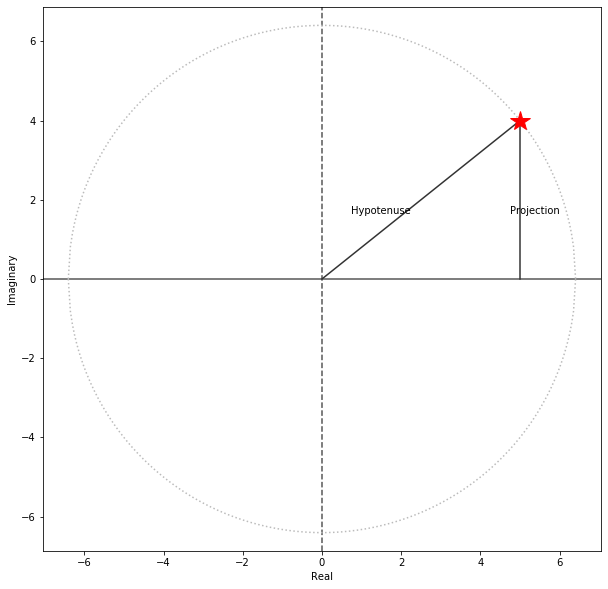

In [53]:
#A complex Number
c1 = 5 +4j
c2 = complex(3,6)
print('A Complex Number : ',c1, c2)

#Conjugate of complex number
c1_conj = c1.conjugate()
print('Complex Conjugate of C1 = ',c1_conj)

#Python cmath module - provide access to mathematical functions for complex numbers. 
#Phase of complex number - the angle between the real axis and the vector representing the imaginary part.
#The phase returned by math/cmath modules are in radians and 
#we use the numpy.degrees() function to convert it to degrees.
# phase
phase = cmath.phase(c1)
print(f'{c1} Phase = {round(phase,2)} radian = {round(np.degrees(phase),2)} degree')
print(f'{c1_conj} Phase = {round(cmath.phase(c1_conj),2)} radian = {round(np.degrees(cmath.phase(c1_conj)),2)} degree')

# we can get phase using math.atan2() function too
print('Complex number phase using math.atan2() =', round(math.atan2(c1.imag, c1.real),2))

plot_axes()
plot_circle(c1)
argand_single(c1)

### A Quantum State and its phase

In [55]:
from math import pi,cos,sin,sqrt
theta=pi/2 #pi/6
print(f"cosine squared of 𝛉/2 is {cos(theta/2)**2:.3f}")

cosine squared of 𝛉/2 is 0.500


In [56]:
#Function to get a particular quantum state from a Quantum Circuit
def get_quantumState(theta,phi):
    circ = QuantumCircuit(1,1)
    if phi==0:
        circ.rx(theta,0)
    else:
        circ.u3(theta,phi,0,0)
    results = execute(circ, backend=Aer.get_backend('statevector_simulator')).result()
    quantum_state = results.get_statevector(circ, decimals=3)
    return (quantum_state)

[0.707+0.j    0.   -0.707j]


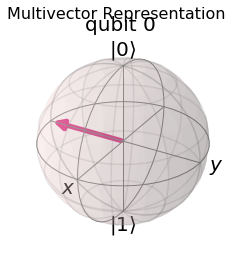

In [57]:
q_phi=get_quantumState(theta,0)
print(q_phi)
# Bloch sphere visualization tool: 
plot_bloch_multivector(q_phi, 'Multivector Representation')
#iplot_state_qsphere(quantum_state)

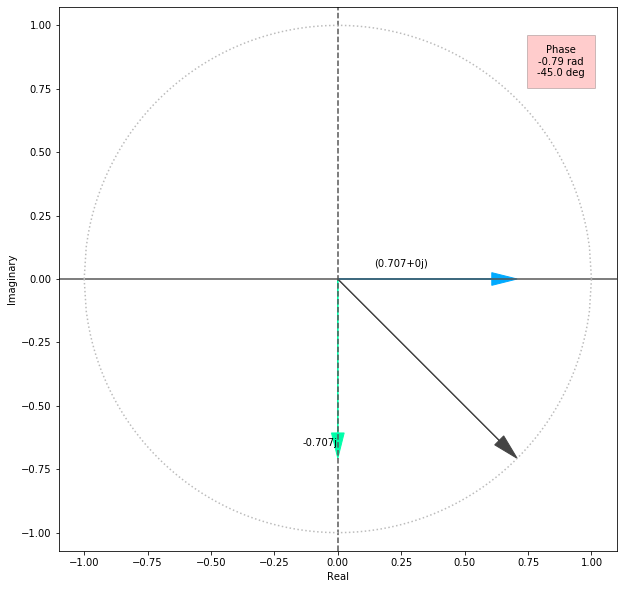

In [58]:
plot_axes()
argand_vector(q_phi)

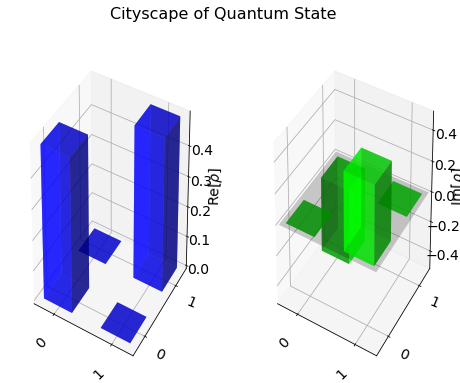

In [59]:
from qiskit.visualization import plot_state_city
plot_state_city(q_phi,'Cityscape of Quantum State',(8,6),('#0000FF','#00FF00'),.6)

[0.707+0.j    0.   -0.707j]


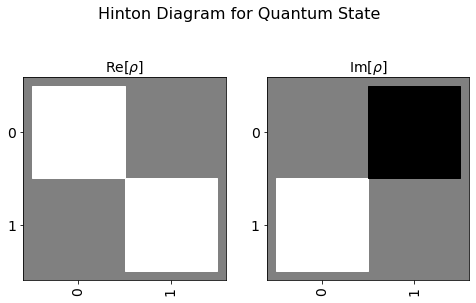

In [27]:
#Hinton diagrams are useful for visualizing the values of a 2D array
#Positive and negative values are represented by white and black squares, respectively, 
#and the size of each square represents the magnitude of each value.
print(q_phi)
from qiskit.visualization import plot_state_hinton
plot_state_hinton(q_phi,'Hinton Diagram for Quantum State')

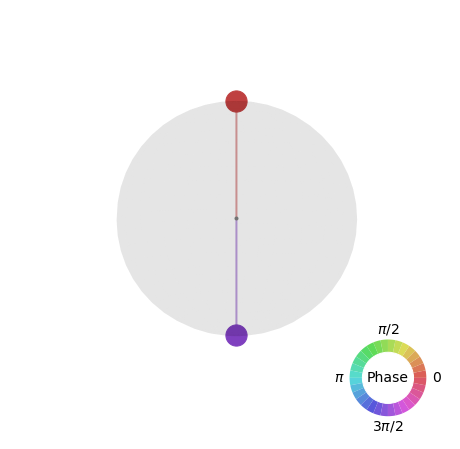

In [28]:
plot_state_qsphere(q_phi,(8,8))

In [62]:
#Now we will create another quantum state using an identical circuit
q_psi = get_quantumState(pi/6,0)
print('|Q_PHI> : ', q_phi)
print('|Q_PSI> : ', q_psi)

|Q_PHI> :  [0.707+0.j    0.   -0.707j]
|Q_PSI> :  [0.966+0.j    0.   -0.259j]


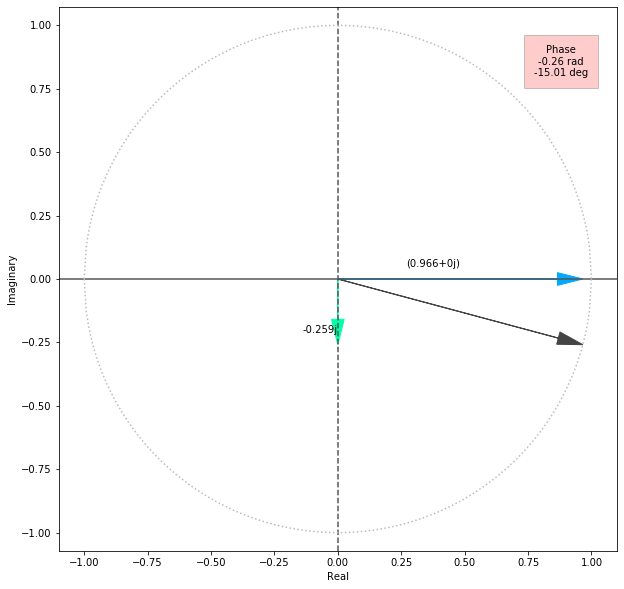

In [63]:
plot_axes()
argand_vector(q_psi)

### Measurement Probability of $|\psi>$ w.r.t $|\phi>$
$P = |<\phi|\psi>|^2$

[0.707-0.j    0.   +0.707j]
Measurement Probability :  0.7500859056249999


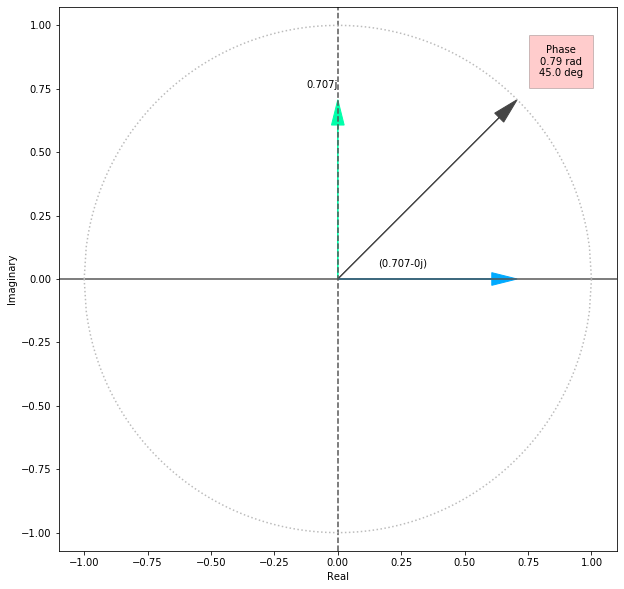

In [64]:
bra_phi=np.conjugate(q_phi)
print(bra_phi)
print('Measurement Probability : ',abs(np.dot(bra_phi,q_psi))**2)
plot_axes()
argand_vector(bra_phi)

### Global Phase - Does it matter?

[ 0.   -0.966j -0.259+0.j   ]
Measurement Probability :  0.7500859056249999
1.0


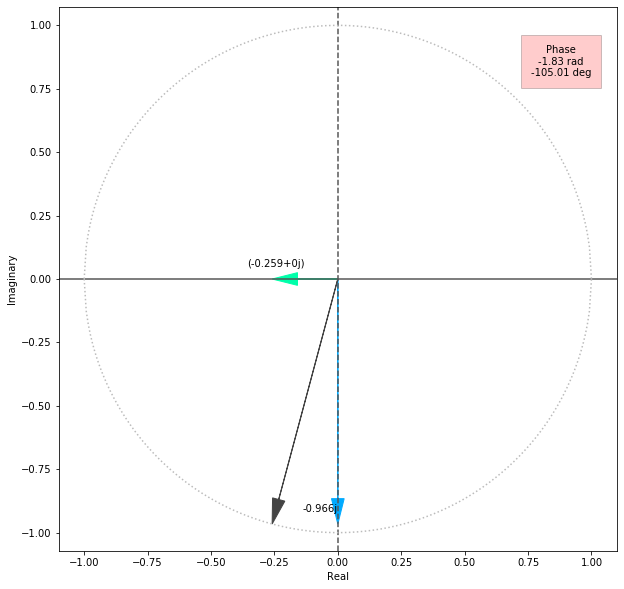

In [67]:
#What if we multiply q_psi with i (to add a global phase to q_psi)
q_psi_i = q_psi*(-1.0j)
print(q_psi_i)
#Now what happens to the measurement probability w.r.t q_phi?
print('Measurement Probability : ',abs(np.dot(bra_phi,q_psi_i))**2)
#The measurement probability remains unchanged
print(abs((0+1.j)**2))
plot_axes()
argand_vector(q_psi_i)

This is because, $|\psi_{i}> = i|\psi>$ and the measurement probability P is, <br>
$P = |<\phi|\psi_i>|^2 = |<\phi|i|\psi>|^2 = |<\phi|\psi>|^2$ as $|i|^2 = 1$

Hence <b>Global Phase</b> is immaterial, does not matter as far as measurements are concerned.

### Relative Phase in a qubit with superposition

[0.966+0.j    0.   -0.259j]
[0.966+0.j    0.224+0.129j]
Measurement Probability :  0.7500859056249999
Measurement Probability :  0.375259137505


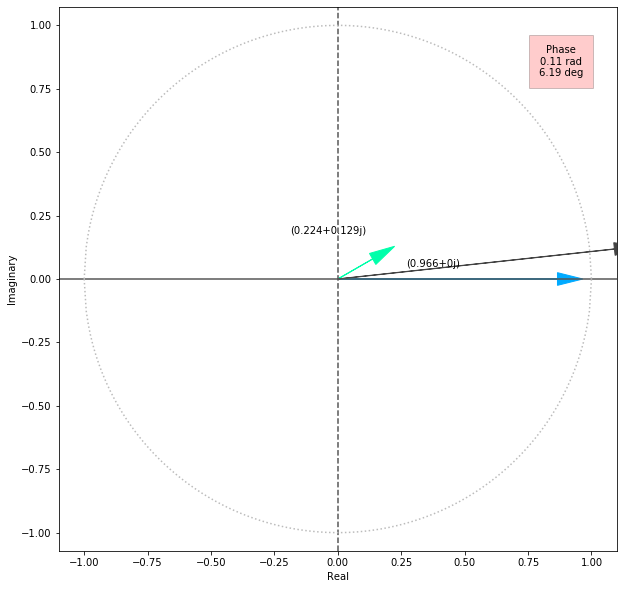

In [68]:
#Now we will create two states psi_1 and psi_2 with a relative phase between the two
q_psi_1 = q_psi
q_psi_2 = get_quantumState(pi/6,pi/6) #adding a relative phase e^(i*pi/6)
print(q_psi_1)
print(q_psi_2)
print('Measurement Probability : ',abs(np.dot(bra_phi,q_psi_1))**2)
print('Measurement Probability : ',abs(np.dot(bra_phi,q_psi_2))**2)

#We cannot draw this in 2D, but still
plot_axes()
argand_vector(q_psi_2)

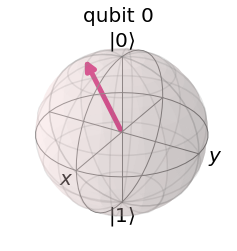

In [151]:
#How do the two vectors psi_1 and psi_2 look
plot_bloch_multivector(q_psi_1)

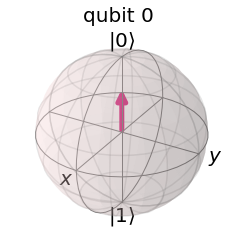

In [152]:
plot_bloch_multivector(q_psi_2)

### How to implement an arbitrary qubit state in Qiskit

An arbitrary qubit state can be given as <br>
$|q> = cos(\frac{\theta}{2})|0> + e^{i\phi}sin(\frac{\theta}{2})|1>$ where <br>
$0 < \theta < \pi$ and $0 < \phi <2\pi$

[9.80785280e-01+0.j         1.19458369e-17+0.19509032j]


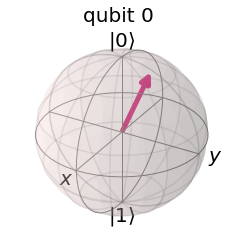

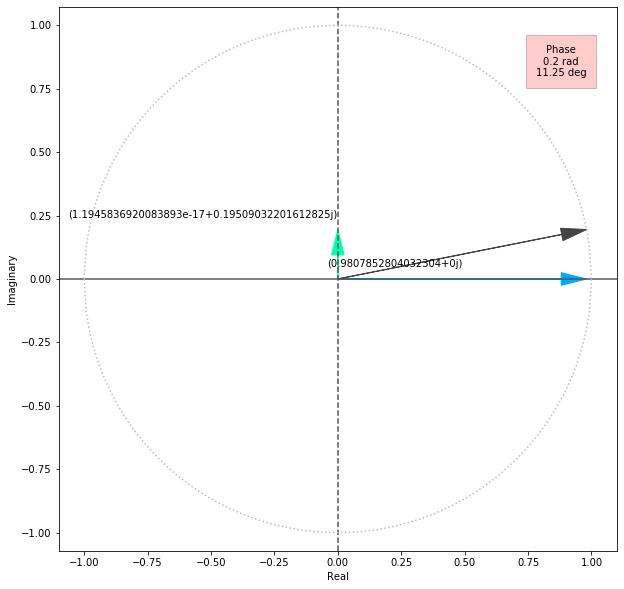

In [69]:
theta=math.pi/8
phi=math.pi/2
x_1 = 1.+0.j
x_0 = 0.+0.j
#Hence a |0> and |1> means
ket_0 = np.array([x_1, x_0])
ket_1 = np.array([x_0, x_1])

q = cmath.cos(theta/2)*ket_0 + cmath.exp(phi*1.j)*cmath.sin(theta/2)*ket_1
print(q)
#We, in general, may not be able to draw this in 2D, but still
plot_axes()
argand_vector(q)

plot_bloch_multivector(q)

In [71]:
#How to achieve such a state in a Qiskit Circuit?
circ = QuantumCircuit(1,1)
circ.u3(theta,phi,0,0)
#circ.ry(theta,0)
#circ.rz(phi,0)
results = execute(circ, backend=Aer.get_backend('statevector_simulator')).result()
quantum_state = results.get_statevector(circ, decimals=3)
print (quantum_state)

[0.981+0.j    0.   +0.195j]


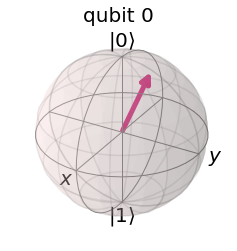

In [72]:
plot_bloch_multivector(quantum_state)

### How do we calculate the phase of a state vector?

Now, suppose we have a state $\vert \psi \rangle=\frac{1}{\sqrt{2}}(\vert 0 \rangle+e^{i\phi}\vert 1 \rangle)$. How do we calculate the phase?<br>
We add a Hadamard gate. So, <br>
$$
H\vert \psi \rangle=H(\frac{1}{\sqrt{2}}(\vert 0 \rangle+e^{i\phi}\vert 1 \rangle)) 
\\
= \frac{1}{2}[(1+e^{i\phi})\vert 0 \rangle+(1-e^{i\phi})\vert 1 \rangle]
$$

What are the probabilities of $\vert 0 \rangle$ and $\vert 1 \rangle$?

$$
P(0)=\frac{1}{4}\mid1+e^{i\phi}\mid^2=\frac{1}{2}[1+cos(θ)]\\
P(1)=\frac{1}{4}\mid1-e^{i\phi}\mid^2=\frac{1}{2}[1-cos(θ)]
$$
So now we may measure the phase $\phi$ as,<br>
$$
\phi=\arccos[P(0)−P(1)]=\arccos[1−2P(1)]=\arccos[2P(0)−1]
$$

So, now let us create a qubit, as $\vert \psi \rangle=\frac{1}{\sqrt{2}}(\vert 0 \rangle+e^{i \pi/2}\vert 1 \rangle)$.


[7.07106781e-01+0.j         4.32978028e-17+0.70710678j]


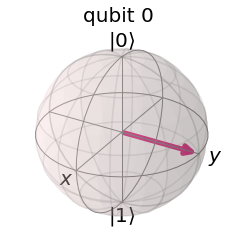

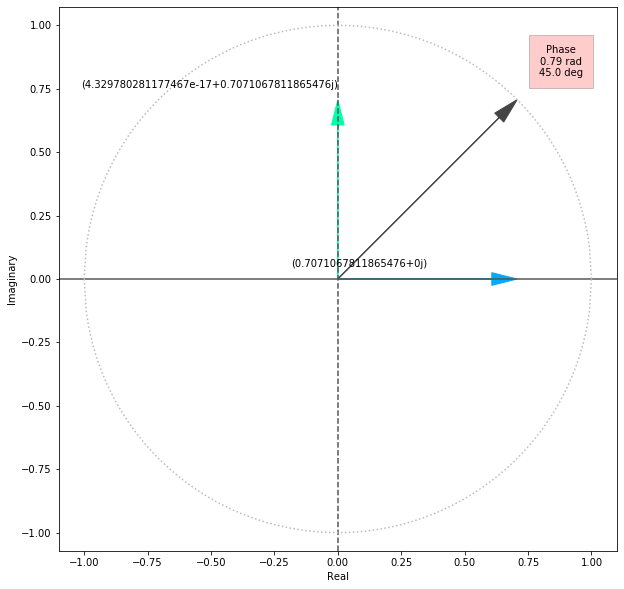

In [73]:
theta=math.pi/2
phi=math.pi/2
q = cmath.cos(theta/2)*ket_0 + cmath.exp(phi*1.j)*cmath.sin(theta/2)*ket_1
print(q)
#We, in general, may not be able to draw this in 2D, but still
plot_axes()
argand_vector(q)

plot_bloch_multivector(q)

In [74]:
#How to achieve such a state in a Qiskit Circuit?
circ = QuantumCircuit(1,1)
circ.u3(theta,phi,0,0)
#circ.ry(theta,0)
#circ.rz(phi,0)
results = execute(circ, backend=Aer.get_backend('statevector_simulator')).result()
quantum_state = results.get_statevector(circ, decimals=3)
print (quantum_state)

[0.707+0.j    0.   +0.707j]


In [75]:
circ.measure(0,0)
results = execute(circ, backend=Aer.get_backend('qasm_simulator'), shots=1024).result()
counts = results.get_counts()
print (counts)

{'1': 518, '0': 506}


In [76]:
phase = math.acos((counts['0']-counts['1'])/1024)
print(math.degrees(phase))

90.67145028504436


Generally speaking, if an event has $2$ possible outcomes, viz., $\vert 0 \rangle$ and $\vert 1 \rangle$ and the probabilities of finding results are $P_0$ and $P_1$ respectively, the the phase gives an idea of how much these probabilities are away from one another.

### How do we create an arbitrary vector

Say, we want to initialize a qubit with a vector,
$$
\vert \psi \rangle = \frac{1+i}{\sqrt{3}}\vert 0 \rangle - \frac{i}{\sqrt{3}}\vert 1 \rangle
$$

How do achieve this in Qiskit?

We put it in the form
$$
\vert \psi \rangle = \frac{1+i}{\sqrt{3}}\vert 0 \rangle - \frac{i}{\sqrt{3}}\vert 1 \rangle = cos(\frac{\theta}{2})|0> + e^{i\phi}sin(\frac{\theta}{2})|1>
$$ where <br>
$0 < \theta < \pi$ and $0 < \phi <2\pi$
and then calculate $\theta$ and $\phi$

So,
$$
cos(\frac{\theta}{2}) = \frac{1+i}{\sqrt{3}}\\
e^{i\phi}sin(\frac{\theta}{2}) = - \frac{i}{\sqrt{3}}
$$
Therefore,
$$
\theta = 2 * \arccos{\frac{1+i}{\sqrt{3}}} \\
\phi = i * ln(\frac{- \frac{i}{\sqrt{3}}}{sin(\frac{\theta}{2})})
$$

In [79]:
#We create the quantum state manually first
arb_quantum_state = ((1+1.j)/math.sqrt(3))*ket_0 - (1.j/math.sqrt(3))*ket_1
print(arb_quantum_state)


theta = 2*cmath.acos((1+1.j)/cmath.sqrt(3))
print('theta : ',theta)
sinValue = cmath.sin(theta/2)
print(sinValue)
phase = -1*(1.j/cmath.sqrt(3))/sinValue
phi = cmath.log(phase)/1.j
print('phi : ',phi)

# Use these theta and phi to create the circuit
circ = QuantumCircuit(1,1)
#Verify why complex values are not allowed
#circ.u3(theta.real,phi.real,0,0)
circ.u3(theta,phi,0,0)

results = execute(circ, backend=Aer.get_backend('statevector_simulator')).result()
quantum_state = results.get_statevector(circ, decimals=3)
print (quantum_state)

[0.57735027+0.57735027j 0.        -0.57735027j]
theta :  (2.135521592658412-1.2374811137735784j)
(1.0492498332510383-0.31768728740277213j)
phi :  (-1.2767950250211129+0.6412373393653841j)


TypeError: can't convert complex to float

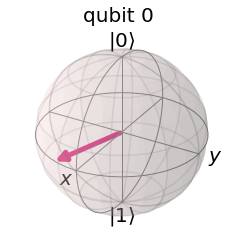

In [45]:
plot_bloch_multivector(quantum_state)